In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#non deve essere regolarizzato?
c_params = np.logspace(-2, 2, 5)

coefs = []
train_perf = []
test_perf = []

for i in tqdm(range(c_params.size)):
    clf = LogisticRegression(C = c_params[i] , solver = "sag", tol=0.1)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_.tolist())
    train_perf.append(clf.score(X_train, y_train))
    test_perf.append(clf.score(X_test, y_test))


100%|██████████| 5/5 [00:36<00:00,  7.27s/it]


Text(0, 0.5, '$R^2$')

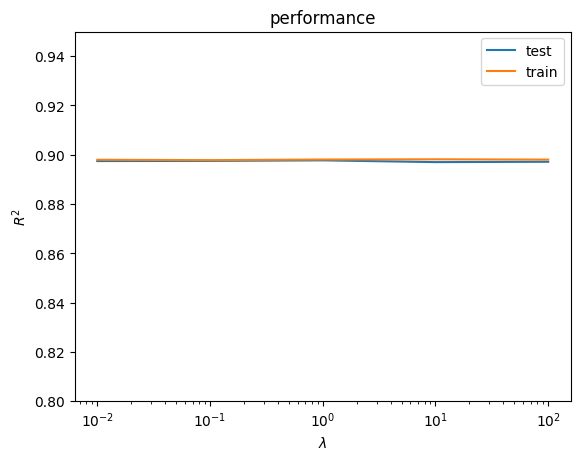

In [7]:
#plotting performance in function of regularization parameter
fig, ax = plt.subplots()
ax.semilogx(c_params, test_perf, label = "test")
ax.semilogx(c_params, train_perf, label = "train")

ax.set_title("performance")
ax.legend()
ax.set(ylim=(0.8, 0.95))
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$R^2$")

In [26]:
#calculating sparsity

#taking a specific reg. parameter. As seen in the performance graph, it is irrelevant which one we choose.
coef = np.array(coefs[0])

tolerance = 0.0001
zero_num = 0 #initializing number of 0 in coef arrays. length is ten, because it's the number of classes
sparsity = []

for j in range(len(coef)):
    for c in coef[j]:
        if c < tolerance:
            zero_num += 1
    sparsity.append(1-zero_num/coef[j].size)
    zero_num = 0


sparsity

[0.3647959183673469,
 0.2997448979591837,
 0.43494897959183676,
 0.3979591836734694,
 0.2755102040816326,
 0.3520408163265306,
 0.38265306122448983,
 0.36734693877551017,
 0.35459183673469385,
 0.2857142857142857]

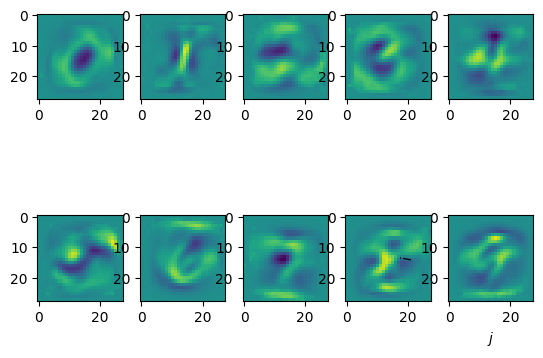

In [18]:
#visualizing coefficents
max_coef = np.abs(coef).max()
fig, ax = plt.subplots(2,5)
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(coef[5*i+j].reshape(28, 28), vmin = -max_coef, vmax = max_coef)
        plt.xlabel(r"$j$")
        plt.ylabel(r"$i$")

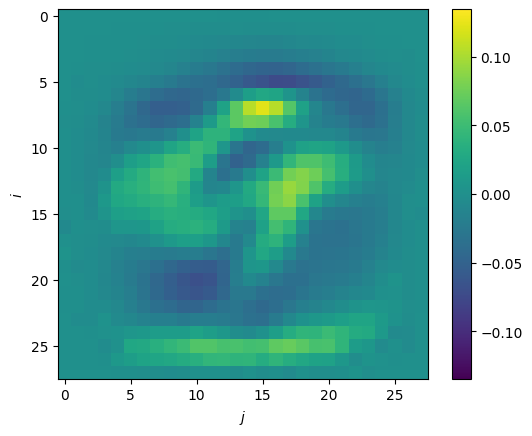

In [30]:
#saving coefficents in images
max_coef = np.abs(coef).max()
for i in range(2):
    for j in range(5):
        plt.imshow(coef[5*i+j].reshape(28, 28), vmin = -max_coef, vmax = max_coef)
        plt.xlabel(r"$j$")
        plt.ylabel(r"$i$")
        if(j == 4 and i == 1):
            plt.colorbar()
        plt.savefig(f'relazione/immagini/coefs{5*i+j}.png')